# Do / To Do

In [2]:
# 2022-12-21
## Do - 오전 : 데이터탐색 리뷰, 프로젝트 주제 타당성 검토, 데이터 및 기술타당성 검토, 계획서 작성 및 제출
## Do - 오후 : 딥러닝 모델 준비 - OutPut이 2종류인 이미지 분류 Sequential 모델 작성 (중)
## To Do : 딥러닝 Sequential 모델 완성 / CNN 모델 추가 / 객체탐지 attatch / Mobile - Code 간 연동

# 2022-12-22
## Do - 오전 : 이미지 리사이징 기술 탐색
## Do - 오후 : 다중 출력 딥러닝 모델 (Dense) 완성
## To Do : 다중출력모델 - CNN 모델 추가 / 테스트 데이터 크롤링 / 객체탐지 attatch / Mobile - Code 간 연동

# 2022-12-23
## Do - 오전 : 다중출력모델 - CNN 모델 완성 / train 데이터 추가 수집 논의
## Do - 오후 : 코드 베이스라인 완성 / train 데이터 추가 수집
## To Do : 모델 최적화 / 객체탐지 attatch / Mobile - Code 간 연동 / 발표준비

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 배움

In [4]:
# softmax : 모든 변수 확률값의 합이 1
# sigmoid : 0 ~ 1 사이 값을 가짐??

In [5]:
# loss 함수
## spares_..._crossentropy : 원 핫 인코딩에 대한 로스
## ..._crossentropy : 레이블 인코딩에 대한 로스

In [6]:
# 이미지 사이즈 정의

width = 120
height = 120
channel = 3
batch_size = 64

# 사전 준비 (Import, Mount)

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob as glob
import cv2


In [11]:

path = '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data'


# 데이터 준비

## data preperence

In [12]:
class dataset:
    
    # 인코딩 값 Notice
    fresh = ['stale', 'fresh']
    kind = ['apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']


    def load_data():
        # 모든 이미지 경로명 데이터를 리스트로 담아 뽑기
        img_list_png = glob.glob(path + '/*/*.png', recursive=True)
        img_list_jpg = glob.glob(path + '/*/*.jpg', recursive=True)
        img_list_jpeg = glob.glob(path + '/*/*.jpeg', recursive=True)
        img_list = img_list_png + img_list_jpg + img_list_jpeg
        
        for i in range(len(img_list)) :
            img_list[i] = img_list[i].replace('\\','/')
        return img_list
  

    def label_split(img_list):
        # 레이블 종류별로 나누기 (fresh, kind)
        fresh_list =  []
        kind_list =  []
        for i in img_list:
            split_list = i.split('/')[-2].split('_')
            fresh_list.append(split_list[0])
            kind_list.append(split_list[1])
        return fresh_list, kind_list
  

    def label_encoding_kind(kind_or_fresh_list):
    # 레이블 인코딩
        # label = list(set(kind_or_fresh_list))
        label = ['pepper', 'orange', 'peach', 'strawberry', 'capsicum', 'apple', 'cherryTomato', 'broccoli', 'banana', 'grape']
        print(label)
        globals()['kind_list'] = label
        df = kind_or_fresh_list.copy()
        for i, j in enumerate(df):
            for n, m in enumerate(label):
                if j == m:
                    df[i] = n
        return np.array(df)
    
    def label_encoding_fresh(kind_or_fresh_list):
    # 레이블 인코딩
        label = ['stale', 'fresh']
        print(label)
        globals()['fresh_list'] = label
        df = kind_or_fresh_list.copy()
        for i, j in enumerate(df):
            for n, m in enumerate(label):
                if j == m:
                    df[i] = n
        return np.array(df)

  
    def train_val_test(img_list, train_test_rate=0.3, train_val_rate=0.2):
        # train - val - test 데이터셋 분리
        from sklearn.model_selection import train_test_split
        import numpy as np

        # img_list = dataset.load_data()
        # globals()['fresh_list'], globals()['kind_list'] = dataset.label_split(img_list)

        ## x data
        x_train, x_test = train_test_split(img_list, test_size = train_test_rate)
        x_train, x_val = train_test_split(x_train, test_size = train_val_rate)

        y_train_fresh, y_train_kind = dataset.label_split(x_train)
        y_val_fresh, y_val_kind = dataset.label_split(x_val)
        y_test_fresh, y_test_kind = dataset.label_split(x_test)

        ## y data
        y_train_fresh = dataset.label_encoding_fresh(y_train_fresh)
        y_train_kind = dataset.label_encoding_kind(y_train_kind)
        y_val_fresh = dataset.label_encoding_fresh(y_val_fresh)
        y_val_kind = dataset.label_encoding_kind(y_val_kind)
        y_test_fresh = dataset.label_encoding_fresh(y_test_fresh)
        y_test_kind = dataset.label_encoding_kind(y_test_kind)

        return x_train, x_val, x_test, y_train_fresh, y_val_fresh, y_test_fresh, y_train_kind, y_val_kind, y_test_kind


    def view_sample_img(img_list, sample_size=6):
        # img list에서 샘플 이미지 보기
        import random
        import matplotlib.pyplot as plt
        from keras.utils import img_to_array
        from PIL import Image
        rand_idx = random.sample(img_list, sample_size)
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(f'samples / size = {sample_size}')
        for i, j in enumerate(rand_idx):
            img_path = j
            plt.subplot(int(sample_size/3),3,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(Image.open(j))
        plt.tight_layout()
        plt.show()
    
    
    def view_test_img(x_test, y_test_fresh, y_test_kind, sample_size=6):
        # img list에서 샘플 이미지 보기
        import random
        import matplotlib.pyplot as plt
        from keras.utils import img_to_array
        from PIL import Image
        rand_idx = np.random.randint(1, len(x_test), sample_size)
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(f'samples / size = {sample_size}')
        for i, j in enumerate(rand_idx):
            plt.subplot(int(sample_size/3),3,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(f' fresh : {dataset.fresh[y_test_fresh[j]]},\n kind : {dataset.kind[y_test_kind[j]]}')
            plt.imshow(x_test[j][0])
        plt.tight_layout()
        plt.show()
    
    


In [13]:
img_list = dataset.load_data()


In [14]:
# 라벨이 똑같이 나올 때 까지 돌릴것
x_train, x_val, x_test, y_train_fresh, y_val_fresh, y_test_fresh, y_train_kind, y_val_kind, y_test_kind = dataset.train_val_test(img_list,0.1,0.2)
kind_list, fresh_list

['stale', 'fresh']
['pepper', 'orange', 'peach', 'strawberry', 'capsicum', 'apple', 'cherryTomato', 'broccoli', 'banana', 'grape']
['stale', 'fresh']
['pepper', 'orange', 'peach', 'strawberry', 'capsicum', 'apple', 'cherryTomato', 'broccoli', 'banana', 'grape']
['stale', 'fresh']
['pepper', 'orange', 'peach', 'strawberry', 'capsicum', 'apple', 'cherryTomato', 'broccoli', 'banana', 'grape']


(['pepper',
  'orange',
  'peach',
  'strawberry',
  'capsicum',
  'apple',
  'cherryTomato',
  'broccoli',
  'banana',
  'grape'],
 ['stale', 'fresh'])

In [15]:
x_train

['/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_apple/Screen Shot 2018-06-08 at 5.09.54 PM.png',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/stale_banana/Screen Shot 2018-06-12 at 9.05.32 PM.png',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_cherryTomato/naver_0159.jpg',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_strawberry/naver_0267.jpg',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/stale_banana/Screen Shot 2018-06-12 at 9.25.18 PM.png',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_peach/naver_0057.png',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_banana/naver_0005.jpg',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/fresh_cherryTomato/tomato1_30.jpg_0_234.jpg',
 '/content/drive/MyDrive/딥러닝_프로젝트_과채어때컴퍼니조/data/stale_apple/Screen Shot 2018-06-07 at 3.05.53 PM.png',


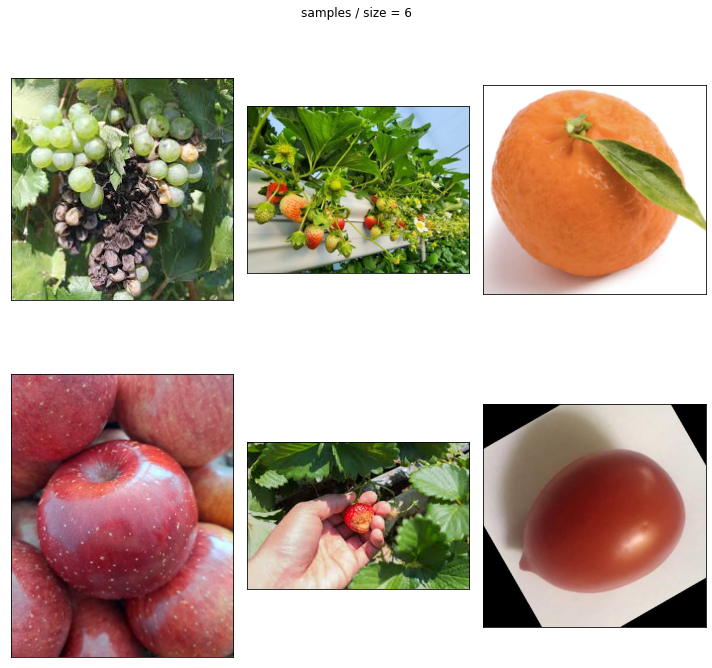

In [16]:
dataset.view_sample_img(img_list)

## Image Generator

이미지 처리는 두 가지 방법 중 하나를 선택해주시면 됩니다.  
(1) image generator 방식  
(2) resize 방식  

In [17]:
# 방법 1 : 이미지 제너레이터
from keras.preprocessing.image import ImageDataGenerator

# 이미지 제너레이터 선언
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.5,
                                   brightness_range=[0.5,1.5],
                                   zoom_range=0.2,
                                   width_shift_range= 0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest'
                                  )
val_datagen = ImageDataGenerator(rescale = 1./255,
                                horizontal_flip=True,
                                   vertical_flip=True,
                                   shear_range=0.5,
                                   brightness_range=[0.5,1.5],
                                   zoom_range=0.2,
                                   width_shift_range= 0.1,
                                   height_shift_range=0.1,
                                   rotation_range=30,
                                   fill_mode='nearest'
                                )
# test_datagen = ImageDataGenerator(rescale = 1./255,
#                                  horizontal_flip=True,
#                                    vertical_flip=True,
#                                    shear_range=0.5,
#                                    brightness_range=[0.5,1.5],
#                                    zoom_range=0.2,
#                                    width_shift_range= 0.1,
#                                    height_shift_range=0.1,
#                                    rotation_range=30,
#                                    fill_mode='nearest'
#                                  )

# 데이터프레임화
x_train_df = pd.DataFrame([x_train, y_train_fresh, y_train_kind]).T
x_val_df = pd.DataFrame([x_val, y_val_fresh, y_val_kind]).T
x_test_df = pd.DataFrame([x_test, y_test_fresh, y_test_kind]).T

In [19]:
from tensorflow import keras
import numpy as np


#train, validataion 제너레이터 선언
train_generator = train_datagen.flow_from_dataframe(x_train_df,
                                                    target_size=(width, height),
                                                    x_col=0,
                                                    y_col=[1, 2],
                                                    color_mode = 'rgb',
                                                    class_mode = 'multi_output',
                                                    batch_size = batch_size,
                                                    shuffle = True)


val_generator = val_datagen.flow_from_dataframe(x_val_df,  
                                                target_size=(width, height),
                                                x_col=0,
                                                y_col=[1, 2],
                                                color_mode = 'rgb',
                                                class_mode = 'multi_output',
                                                batch_size = batch_size,
                                                shuffle = True)

# test_generator = val_datagen.flow_from_dataframe(x_test_df,  
#                                                 target_size=(width, height),
#                                                 x_col=0,
#                                                 y_col=[1, 2],
#                                                 color_mode = 'rgb',
#                                                 class_mode = 'multi_output',
#                                                 batch_size = batch_size,
#                                                 shuffle = True)

# x_train = [train_generator[x][0] for x in range(len(train_generator))]
# y_train_fresh = [train_generator[x][1][0][0] for x in range(len(train_generator))]
# y_train_kind = [train_generator[x][1][0][1] for x in range(len(train_generator))]

# x_val = [val_generator[x][0] for x in range(len(val_generator))]
# y_val_fresh = [val_generator[x][1][0][0] for x in range(len(val_generator))]
# y_val_kind = [val_generator[x][1][0][1] for x in range(len(val_generator))]

# x_test = [test_generator[x][0] for x in range(len(test_generator))]
# y_test_fresh = [test_generator[x][1][0][0] for x in range(len(test_generator))]
# y_test_kind = [test_generator[x][1][0][1] for x in range(len(test_generator))]

Found 3524 validated image filenames.
Found 882 validated image filenames.


In [21]:
# 방법 2 : 리사이징
class image_prep:
    
    def img_resize_and_array(img_path_list, size=(width, height)):
        # 이미지 리사이징 함수
        resized = []
        for i in img_path_list:
            from PIL import Image
            img = Image.open(i)
            resized.append(np.array(img.resize(size).convert('RGB'))*1./255)
        return resized

# 모델 선언

In [22]:
def Sequential_Dense_Model_1():
    from keras.layers import Input, Dense, Flatten, Concatenate
    # from keras.layers import Resizing
    from keras.models import Model

    # inputs = Resizing(width, height, name='inputs')

    inputs = Input((width, height, channel), name='inputs')

    flat = Flatten()(inputs)

    fresh_1 = Dense(1024, activation='relu')(flat)
    fresh_2 = Dense(256, activation='relu')(fresh_1)

    kind_1 = Dense(1024, activation='relu')(flat)
    kind_2 = Dense(256, activation='relu')(kind_1)

    concat = Concatenate()([fresh_2, kind_2])

    fresh_output = Dense(len(set(fresh_list))-1, activation='sigmoid', name='fresh_output')(concat)
    kind_output = Dense(len(set(kind_list)), activation='sigmoid', name='kind_output')(kind_2)

    return Model(inputs = inputs, outputs = [fresh_output, kind_output])

In [23]:

def Sequential_Dense_Model_2():
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh : sigmoid, kind : sigmoid
    ## fresh264-264, kind1024-128 : 7424  / 6245
    ## fresh256-128, kind1024-128 :7380 / 8122
    
    # fresh-rotten은 유닛을 적당히 가져가는 게 정확도 높음
    # kind는 유닛을 많이 가져가는 게 정확도 높음
    # Sequential1 모델보다 2 모델의 정확도 높음
    
    from keras.layers import Input, Dense, Flatten, Concatenate
    # from keras.layers import Resizing
    from keras.models import Model

    # inputs = Resizing(width, height, name='inputs')

    inputs = Input((width, height, channel), name='inputs')

    flat = Flatten()(inputs)

    fresh_1 = Dense(256, activation='relu')(flat)
    fresh_2 = Dense(128, activation='relu')(fresh_1)

    kind_1 = Dense(1024, activation='relu')(flat)
    kind_2 = Dense(128, activation='relu')(kind_1)

    # concat = Concatenate()([fresh_2, kind_2])

    fresh_output = Dense(len(set(fresh_list))-1, activation='sigmoid', name='fresh_output')(fresh_2)
    kind_output = Dense(len(set(kind_list)), activation='sigmoid', name='kind_output')(kind_2)

    return Model(inputs = inputs, outputs = [fresh_output, kind_output])

In [24]:
def CNN_Model_1():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense
    from keras.models import Model
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh - softmax / kind - sigmoid
    ## 배치사이즈 32 : 6245 / 2838
    ## 배치사이즈 128 : 5153 / 3362
    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    flat = Flatten(name='flatten')(pool)

    flat_inputs = Flatten(name='flatten2')(inputs)
    concat = Concatenate()([flat,flat_inputs])
    fresh_output = Dense(len(set(fresh_list))-1,activation='softmax',name='fresh_output')(flat_inputs)
    kind_output = Dense(len(set(kind_list)),activation='sigmoid',name='kind_output')(concat)

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [25]:
# 테스트 필요
def CNN_Model_2():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense
    from keras.models import Model
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh - softmax / kind - sigmoid
    ## 배치사이즈 32 : 6245 / 2838
    ## 배치사이즈 128 : 5153 / 3362
    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    
    conv2 = Conv2D(64,(3,3),activation='relu',name='conv2d2')(pool)
    pool2 = MaxPool2D((2,2),name='maxpool2')(conv2)
    flat2 = Flatten(name='flatten2')(pool2)

    conv3 = Conv2D(64,(3,3),activation='relu',name='conv2d3')(inputs)
    pool3 = MaxPool2D((2,2),name='maxpool3')(conv3)
    flat3 = Flatten(name='flatten3')(pool3)
    dense = Dense(10, activation='relu', name='dense')(flat3)
    
    concat = Concatenate()([flat2,dense])
    fresh_output = Dense(len(set(fresh_list))-1,activation='softmax',name='fresh_output')(dense)
    kind_output = Dense(len(set(kind_list)),activation='sigmoid',name='kind_output')(concat)

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [26]:
def CNN_Model_3_drop_out():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense, Dropout
    from keras.models import Model
    
    from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Adamax
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh - softmax / kind - sigmoid
    ## 배치사이즈 32 : 6245 / 2838
    ## 배치사이즈 128 : 5153 / 3362
    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    
    conv2 = Conv2D(64,(3,3),activation='relu',name='conv2d2')(pool)
    pool2 = MaxPool2D((2,2),name='maxpool2')(conv2)

    Dropout(0.2)
    
    flat = Flatten(name='flatten3')(pool2)
    
    
    dense128 = Dense(128, activation='relu', name='dense128')(flat)
    dense64 = Dense(64, activation='relu', name='dense64')(dense128)
    
    
    f_flat = Flatten()(pool)
    f_dense16 = Dense(32, activation='relu', name='dense16_f')(f_flat)
    
    fresh_output = Dense(len(set(fresh_list))-1,activation='sigmoid',name='fresh_output')(f_dense16)
    
    
    concat = Concatenate()([dense64,f_flat])
    
    kind_output = Dense(len(set(kind_list)), activation='softmax',name='kind_output')(concat)
    
    
    globals()['optimizer'] = Adam(learning_rate = 0.001)
    globals()['fresh_loss'] = 'binary_crossentropy'
    globals()['kind_loss'] = 'sparse_categorical_crossentropy'
    globals()['metrics'] = ['accuracy']
    

    
    

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [27]:
def CNN_Model_4():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense
    from keras.models import Model
    from keras.optimizers import Adam
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh - softmax / kind - sigmoid
    ## 배치사이즈 32 : 6245 / 2838
    ## 배치사이즈 128 : 5153 / 3362
    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    
    conv2 = Conv2D(64,(3,3),activation='relu',name='conv2d2')(pool)
    pool2 = MaxPool2D((2,2),name='maxpool2')(conv2)

    
    
    flat = Flatten(name='flatten3')(pool2)
    
    
    dense64_kind = Dense(64, activation='relu')(flat)
    dense64_fresh = Dense(64, activation='relu')(flat)
    
    dense32_kind = Dense(64, activation='relu')(dense64_kind)
    dense32_fresh = Dense(64, activation='relu')(dense64_fresh)
    
    
    
    fresh_output = Dense(len(set(fresh_list))-1,activation='sigmoid',name='fresh_output')(dense32_fresh) 
    kind_output = Dense(len(set(kind_list)), activation='softmax',name='kind_output')(dense32_kind)
    
    
    globals()['optimizer'] = Adam(learning_rate = 0.002)
    globals()['fresh_loss'] = 'binary_crossentropy'
    globals()['kind_loss'] = 'sparse_categorical_crossentropy'
    globals()['metrics'] = ['accuracy']
    

    
    

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [ ]:
def CNN_Model_4_2():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense
    from keras.models import Model
    from keras.optimizers import Adam

    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    
    conv2 = Conv2D(64,(3,3),activation='relu',name='conv2d2')(pool)
    pool2 = MaxPool2D((2,2),name='maxpool2')(conv2)

    
    
    flat = Flatten(name='flatten3')(pool2)
    
    
    dense64 = Dense(64, activation='relu')(flat)
    
    dense32 = Dense(32, activation='relu')(dense64)
    

    
    fresh_output = Dense(len(set(fresh_list))-1,activation='sigmoid',name='fresh_output')(dense32) 
    kind_output = Dense(len(set(kind_list)), activation='softmax',name='kind_output')(dense32)
    
    
    globals()['optimizer'] = Adam(learning_rate = 0.001)
    globals()['fresh_loss'] = 'binary_crossentropy'
    globals()['kind_loss'] = 'sparse_categorical_crossentropy'
    globals()['metrics'] = ['accuracy']
    

    
    

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [28]:
def CNN_Model_5():
    from keras.layers import Conv2D, MaxPool2D, Flatten, Concatenate, Input, Dense
    from keras.models import Model
    
    from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, Adamax
    
    # score (val-fresh-acc / val-kind-acc)
    # activation : fresh - softmax / kind - sigmoid
    ## 배치사이즈 32 : 6245 / 2838
    ## 배치사이즈 128 : 5153 / 3362
    
    inputs = Input(shape=(width, height, channel),name='inputs')

    conv = Conv2D(128,(3,3),activation='relu',name='conv2d')(inputs)
    pool = MaxPool2D((2,2),name='maxpool')(conv)
    
    conv2 = Conv2D(64,(3,3),activation='relu',name='conv2d2')(pool)
    pool2 = MaxPool2D((2,2),name='maxpool2')(conv2)

    
    flat = Flatten(name='flatten3')(pool2)
    
    
    dense128 = Dense(128, activation='relu', name='dense128')(flat)
    dense64 = Dense(64, activation='relu', name='dense64')(dense128)
    
    
    f_flat = Flatten()(pool)
    
    
    concat = Concatenate()([dense64,f_flat])
    
    
    kind_output = Dense(len(set(kind_list)), activation='softmax',name='kind_output')(concat)
    
    
    concat1 = Concatenate()([kind_output,f_flat])
    
    
    f_dense16 = Dense(32, activation='relu', name='dense16_f')(concat1)
    
    
    fresh_output = Dense(len(set(fresh_list))-1,activation='sigmoid',name='fresh_output')(f_dense16)
    
    
    
    globals()['optimizer'] = Adam(learning_rate = 0.001)
    globals()['fresh_loss'] = 'binary_crossentropy'
    globals()['kind_loss'] = 'sparse_categorical_crossentropy'
    globals()['metrics'] = ['accuracy']
    

    
    

    return Model(inputs=inputs,outputs=[fresh_output,kind_output])

In [29]:
def vgg16_transfer_model():
    from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization,Concatenate
    from keras.models import Model
    from keras.optimizers import Adam

    from keras.applications import VGG16
    
    vgg16 = VGG16(include_top = False , input_shape=(width, height, channel))
    
    for layer in vgg16.layers[:-4]:
            layer.trainable = False
            
    vgg16.summary()
            
    flat = Flatten()(vgg16.output)
    dense128 = Dense(256, activation='relu')(flat)

                                           
                                           
    globals()['optimizer'] = Adam(learning_rate = 0.001)
    globals()['fresh_loss'] = 'binary_crossentropy'
    globals()['kind_loss'] = 'sparse_categorical_crossentropy'
    globals()['metrics'] = ['accuracy']
                                           

    fresh_output = Dense(len(set(fresh_list))-1,activation='sigmoid',name='fresh_output')(dense128) 
    kind_output = Dense(len(set(kind_list)), activation='softmax',name='kind_output')(dense128)
                                           
    return Model(inputs=vgg16.input,outputs=[fresh_output,kind_output])
    
    
    
   

# 모델 선택

In [ ]:
model = CNN_Model_3()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 118, 118, 12  3584        ['inputs[0][0]']                 
                                8)                                                                
                                                                                                  
 maxpool (MaxPooling2D)         (None, 59, 59, 128)  0           ['conv2d[0][0]']                 
                                                                                            

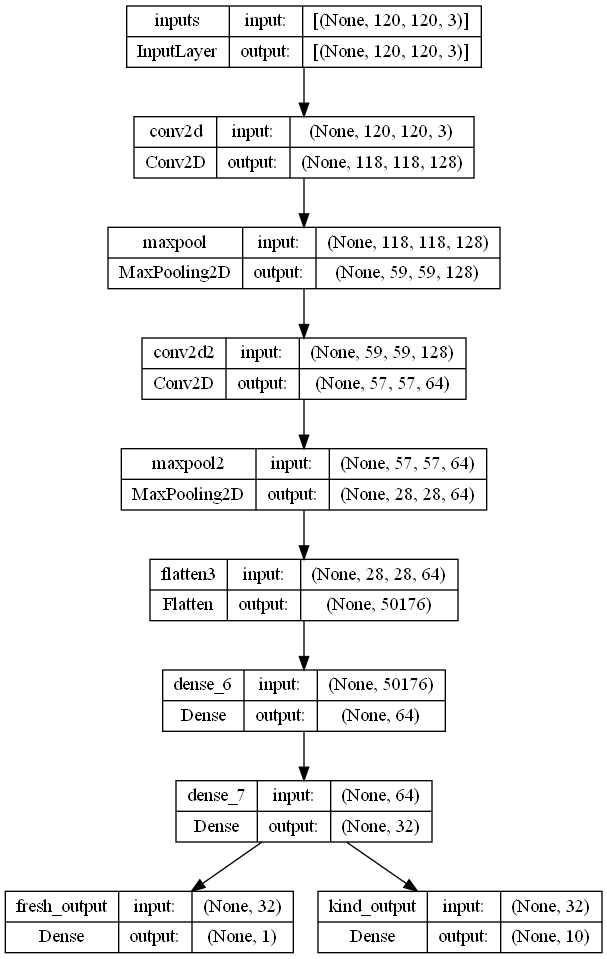

In [ ]:
# 모델 살펴보기
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# 컴파일

In [ ]:
# 하이퍼 파라미터

from keras.metrics import RootMeanSquaredError



In [ ]:
model.compile(optimizer = optimizer,
              loss = [fresh_loss, kind_loss],
              metrics = metrics)

# 학습

이미지 생성 방법에 따라 각기 다른 학습 방법을 사용해줘야 합니다.  
(1) image generator 방식  
(2) resize 방식  

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

checkpoint_path = "Cnn_model4_2_kind_10/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period = 100)


In [ ]:
# 하이퍼 파라미터

epochs = 1000
spe = len(x_train)/batch_size if len(x_train)%batch_size == 0 else len(x_train)/batch_size + 1


In [ ]:
def get_steps(num_samples, batch_size):
  if (num_samples % batch_size) > 0:
    return ( num_samples // batch_size ) + 1

  else :
    return ( num_samples // batch_size )

class_col = ['fresh','apple', 'banana', 'bittergourd', 'capsicum', 'orange', 'tomato']

In [ ]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [ ]:
#['cherryTomato', 'orange', 'banana', 'strawberry', 'capsicum', 'apple']

# image generatory
history = model.fit(train_generator,
                    steps_per_epoch = get_steps(len(x_train_df), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_steps(len(x_val_df),batch_size),
                    callbacks = [cp_callback],
                    epochs = epochs)

Epoch 1/1000
56/56 [==============================] - 22s 380ms/step - loss: 2.6761 - fresh_output_loss: 0.6367 - kind_output_loss: 2.0394 - fresh_output_accuracy: 0.6388 - kind_output_accuracy: 0.2262 - val_loss: 2.2196 - val_fresh_output_loss: 0.5856 - val_kind_output_loss: 1.6340 - val_fresh_output_accuracy: 0.7109 - val_kind_output_accuracy: 0.4059
Epoch 2/1000
56/56 [==============================] - 21s 372ms/step - loss: 2.1481 - fresh_output_loss: 0.5990 - kind_output_loss: 1.5491 - fresh_output_accuracy: 0.6893 - kind_output_accuracy: 0.4455 - val_loss: 2.0361 - val_fresh_output_loss: 0.6112 - val_kind_output_loss: 1.4249 - val_fresh_output_accuracy: 0.6814 - val_kind_output_accuracy: 0.4796
Epoch 3/1000
56/56 [==============================] - 21s 379ms/step - loss: 1.9547 - fresh_output_loss: 0.5959 - kind_output_loss: 1.3588 - fresh_output_accuracy: 0.6986 - kind_output_accuracy: 0.5221 - val_loss: 1.8076 - val_fresh_output_loss: 0.5451 - val_kind_output_loss: 1.2626 - val_

In [ ]:
model.save_weights('Cnn_model_4_2_kind_10/final/cpkt/Cnn_model_4_2_kind_10')

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['fresh_output_loss']
val_loss = his_dict['val_fresh_output_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(epochs,loss,color='blue',label='fresh_output_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_fresh_output_loss')
ax1.set_title('fresh_loss')
ax1.legend()

loss = his_dict['kind_output_loss']
val_loss = his_dict['val_kind_output_loss']

ax2 = fig.add_subplot(2,2,2)
ax2.plot(epochs,loss,color='blue',label='kind_output_loss')
ax2.plot(epochs,val_loss,color='orange',label='val_kind_output_loss')
ax2.set_title('kind_loss')
ax2.legend()

acc = his_dict['fresh_output_accuracy']
val_acc = his_dict['val_fresh_output_accuracy']

ax3 = fig.add_subplot(2,2,3)
ax3.plot(epochs,acc,color='blue',label='fresh_output_accuracy')
ax3.plot(epochs,val_acc,color='orange',label='val_fresh_output_accuracy')
ax3.set_title('fresh_acc')
ax3.legend()


acc = his_dict['kind_output_accuracy']
val_acc = his_dict['val_kind_output_accuracy']

ax4 = fig.add_subplot(2,2,4)
ax4.plot(epochs,acc,color='blue',label='kind_output_accuracy')
ax4.plot(epochs,val_acc,color='orange',label='val_kind_output_accuracy')
ax4.set_title('kind_acc')
ax4.legend()

plt.show()

In [ ]:
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(epochs,loss,color='blue',label='loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()


plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# # resize 사용
# history = model.fit({'inputs' : np.array(image_prep.img_resize_and_array(x_train))},
#                     {'fresh_output' : np.array(y_train_fresh),
#                      'kind_output' : np.array(y_train_kind)},
#                     validation_data = ({'inputs' : np.array(image_prep.img_resize_and_array(x_val))},
#                                        {'fresh_output' : np.array(y_val_fresh), 'kind_output' : np.array(y_val_kind)}),
#                     epochs = epochs,)

# Score

<center>차수</center>

|차수|이미지gen방식|이미지사이즈|dt_split|epochs|최고모델|fresh_acc|kind_acc|비고|
|--|--|--|--|--|--|--|--|--|
|1차|resize|112x112|0.56:0.14:0.3|50|CNN_1|4323|2707|데이터 부족으로 최고, 최저점 차이 큼|
|2차|resize|112x112|0.56:0.14:0.3|50|CNN_1|4279|9258|운좋게 데이터셋 잘 분류된 것으로 보임|
|3차|resize|112x112|0.8:0.2:0.01|50|CNN_1|4630|3241|데이터 부족으로 최고, 최저점 차이 큼|
|4차|resize|112x112|0.8:0.2:0.01|50|CNN_1|4259|9290|운좋게 데이터셋 잘 분류된 것으로 보임|
|5차|resize|112x112|0.8:0.2:0.01|50|CNN_1|4259|9321|조금의 성능 상승이 있으나.. 양질 데이터 대량 필요|
|6차|resize|256x256|0.8:0.2:0.01|50|CNN_1|4259|9136|너무 오래걸림|
|7차|generator|256x256|0.8:0.2:0.01|50|CNN_1|4416|9954|6차와 같은 이미지크기, 시간 반정도로 줄어듦(generator)|


<center>Dense</center>

|차수|모델|1층|유닛수|활성화 함수|2층|유닛수|활성화 함수|3층|유닛수|활성화 함수|출력층|활성화 함수|점수|fresh_acc|kind_acc|time(s)|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|1차|Sequential_2|Dense|(256, 1024)|(relu, relu)|Dense|(128,128)|(relu, relu)|NA|NA|NA|Dense|(sigmoid,sigmoid)|점수|2183|2707|150s|
|2차|Sequential_2|Dense|(256, 1024)|(relu, relu)|Dense|(128,128)|(relu, relu)|NA|NA|NA|Dense|(sigmoid,sigmoid)|점수|2183|7686|150s|
|3차|Sequential_2|Dense|(256, 1024)|(relu, relu)|Dense|(128,128)|(relu, relu)|NA|NA|NA|Dense|(sigmoid,sigmoid)|점수|1420|2623|150s|
|4차|Sequential_2|Dense|(256, 1024)|(relu, relu)|Dense|(128,128)|(relu, relu)|NA|NA|NA|Dense|(sigmoid,sigmoid)|점수|1667|7315|150s|


<center>CNN</center>

|차수|모델|1층|배치사이즈|활성화 함수|2층|배치사이즈|활성화 함수|3층|배치사이즈|활성화 함수|출력층|활성화 함수|점수|fresh_acc|kind_acc|time(s)|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|1차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|NA|NA|NA|Dense|(softmax,sigmoid)|점수|4323|2707|150s|
|2차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|NA|NA|NA|Dense|(softmax,sigmoid)|점수|4279|9258|150s|
|3차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|NA|NA|NA|Dense|(softmax,sigmoid)|점수|4630|3241|210s|
|4차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|NA|NA|NA|Dense|(softmax,sigmoid)|점수|4259|9290|210s|
|5차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|(Conv2D, Dense)|(64,10)|relu|Dense|(softmax,sigmoid)|점수|4259|9290|210s|
|6차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|(Conv2D, Dense)|(64,10)|relu|Dense|(softmax,sigmoid)|점수|4259|9136|3600s|
|7차|CNN_1|Conv2D|128|relu|MaxPool2D|NA|NA|(Conv2D, Dense)|(64,10)|relu|Dense|(softmax,sigmoid)|점수|4416|9954|1700s|

# test

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 )
test_generator = val_datagen.flow_from_dataframe(x_test_df,  
                                                target_size=(width, height),
                                                x_col=0,
                                                y_col=[1, 2],
                                                color_mode = 'rgb',
                                                class_mode = 'multi_output',
                                                batch_size = batch_size,
                                                shuffle = False)


In [ ]:
evaluated = model.evaluate(test_generator)

In [ ]:
preds = model.predict(test_generator,steps=get_steps(len(x_test_df),batch_size),verbose=1)

In [ ]:
def classification_report_maker(y, pred):
    from sklearn.metrics import classification_report
    label_list_test = y.tolist()
    pred_list = []

    for find_max in pred:
        x = find_max
        x = x.tolist()
        pred_list.append(x.index(max(x)))
    
    print(classification_report(label_list_test,pred_list))

In [ ]:

def classification_report_maker_fresh(y, pred):
    from sklearn.metrics import classification_report
    label_list_test = y.tolist()
    pred_list = []

    for x in pred:
        x_ = 0
        x = x.tolist()
        if x[0] >= 0.5 : 
            x_ = 1

        pred_list.append(x_)
    
    print(classification_report(label_list_test,pred_list))

In [ ]:
def classification_report_maker_full(y,pred):
    classification_report_maker(y[2], pred[1])
    classification_report_maker_fresh(y[1], pred[0])
    

In [ ]:
classification_report_maker_full(x_test_df, preds)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 )
test_generator = val_datagen.flow_from_dataframe(x_test_df,  
                                                target_size=(width, height),
                                                x_col=0,
                                                class_mode=None,
                                                shuffle = False
                                                
                                                )

In [ ]:
preds = model.predict(test_generator,verbose=1)

In [ ]:
for i in range(0,10):
    n =  i *8

    import matplotlib.pyplot as plt


    fresh_preds = preds[0][n:8+n]
    kind_preds = preds[1][n:8+n]

    for i ,pred in enumerate(kind_preds):

      plt.subplot(2,4,i+1)

      prob = zip(kind_list,list(kind_preds[i]))
      # print(list(prob))

      prob = sorted(list(prob),key=lambda x:x[1],reverse=True)
      print(prob)

      # print(prob)
      image = cv2.imread(x_test_df[0][i+n])
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      plt.imshow(image)
      plt.title(f'fresh:{round(float(fresh_preds[i])*100,2)}% \n{prob[0][0]}:{round(prob[0][1]*100,2)}%')
    plt.tight_layout()

    plt.savefig(f'Cnn_model_4_2_kind_10/final/test_result{n}~{n+8}.jpg')

    plt.show()

In [ ]:
# model.load_weights("Cnn_model_vgg/cp-0100.ckpt")

In [ ]:
# model.save_weights('Cnn_model3/final/cnn_model_0100/cp100')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 )
test_generator = val_datagen.flow_from_dataframe(x_test_df,  
                                                target_size=(width, height),
                                                x_col=0,
                                                y_col=[1, 2],
                                                color_mode = 'rgb',
                                                class_mode = 'multi_output',
                                                batch_size = batch_size,
                                                shuffle = False)


Found 490 validated image filenames.


In [ ]:
evaluated = model.evaluate(test_generator)

8/8 [==============================] - 2s 255ms/step - loss: 0.9199 - fresh_output_loss: 0.3771 - kind_output_loss: 0.5428 - fresh_output_accuracy: 0.9020 - kind_output_accuracy: 0.8918


In [ ]:
preds = model.predict(test_generator,steps=get_steps(len(x_test_df),batch_size),verbose=1)

8/8 [==============================] - 2s 299ms/step


In [ ]:
classification_report_maker_full(x_test_df,preds)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        89
           1       1.00      0.84      0.91        43
           2       0.89      0.89      0.89        35
           3       0.82      0.93      0.87        55
           4       0.91      0.91      0.91        34
           5       0.88      0.95      0.92        64
           6       0.96      0.68      0.79        40
           7       0.88      0.93      0.90        15
           8       1.00      0.91      0.95        53
           9       0.85      0.92      0.88        62

    accuracy                           0.90       490
   macro avg       0.91      0.89      0.89       490
weighted avg       0.90      0.90      0.90       490

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       184
           1       0.93      0.90      0.91       306

    accuracy                           0.89       490
   macro avg       0.88

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 )
test_generator = val_datagen.flow_from_dataframe(x_test_df,  
                                                target_size=(width, height),
                                                x_col=0,
                                                class_mode=None,
                                                shuffle = False
                                                
                                                )

Found 490 validated image filenames.


In [ ]:
preds = model.predict(test_generator,verbose=1)

16/16 [==============================] - 2s 153ms/step


[('grape', 0.99999666), ('strawberry', 3.1305417e-06), ('broccoli', 2.3888776e-07), ('cherryTomato', 1.2252236e-08), ('pepper', 2.5648108e-09), ('capsicum', 2.293795e-09), ('peach', 1.5991384e-09), ('orange', 2.7159618e-11), ('apple', 1.2372949e-11), ('banana', 3.3647615e-14)]
[('apple', 0.9999548), ('orange', 4.4767763e-05), ('banana', 3.9273266e-07), ('peach', 7.117772e-09), ('pepper', 3.7828243e-09), ('capsicum', 3.7336062e-10), ('cherryTomato', 3.6844656e-11), ('strawberry', 3.3773917e-13), ('grape', 3.4847857e-14), ('broccoli', 3.2045917e-17)]
[('pepper', 1.0), ('strawberry', 2.5387571e-08), ('banana', 5.6616116e-09), ('orange', 2.336278e-10), ('capsicum', 3.5570057e-11), ('broccoli', 2.741238e-11), ('cherryTomato', 1.5834082e-11), ('peach', 2.5286036e-12), ('apple', 2.1104882e-12), ('grape', 4.8944014e-13)]
[('apple', 1.0), ('orange', 3.7135545e-10), ('capsicum', 3.234028e-16), ('banana', 3.498244e-17), ('peach', 4.5008882e-18), ('strawberry', 2.9922622e-18), ('broccoli', 1.38682

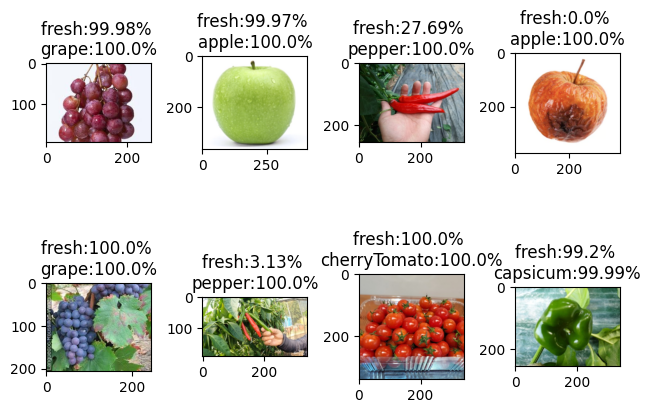

[('strawberry', 0.9999106), ('grape', 6.619501e-05), ('cherryTomato', 7.6210517e-06), ('broccoli', 7.4195896e-06), ('apple', 4.3633327e-06), ('peach', 2.8308255e-06), ('pepper', 5.180615e-07), ('orange', 2.5908918e-07), ('capsicum', 1.3339566e-07), ('banana', 1.4951717e-11)]
[('orange', 0.9999999), ('apple', 1.0088664e-07), ('cherryTomato', 1.5999712e-08), ('peach', 1.9081203e-10), ('strawberry', 5.80115e-12), ('pepper', 4.7140774e-13), ('banana', 8.612443e-14), ('broccoli', 1.0342574e-15), ('grape', 2.6554299e-18), ('capsicum', 7.9316695e-19)]
[('pepper', 1.0), ('broccoli', 5.0593297e-13), ('banana', 3.802358e-14), ('capsicum', 2.7304217e-14), ('strawberry', 6.223372e-15), ('apple', 3.6070465e-17), ('orange', 6.8182815e-18), ('grape', 6.7880224e-18), ('peach', 4.833828e-21), ('cherryTomato', 6.512593e-22)]
[('grape', 0.9999764), ('capsicum', 9.023661e-06), ('peach', 8.426432e-06), ('apple', 3.7563807e-06), ('pepper', 1.5855538e-06), ('broccoli', 6.5885393e-07), ('strawberry', 1.030004

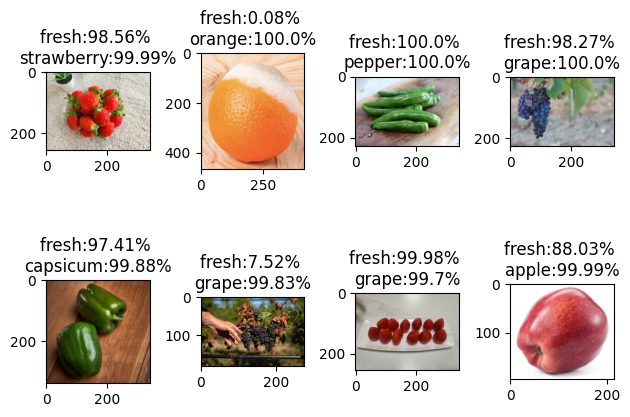

[('pepper', 0.99999857), ('strawberry', 1.0630147e-06), ('banana', 3.417878e-07), ('cherryTomato', 3.6489554e-09), ('orange', 1.0723684e-09), ('broccoli', 9.833158e-10), ('capsicum', 1.9597753e-10), ('peach', 1.4458582e-10), ('apple', 7.2788615e-11), ('grape', 7.29537e-12)]
[('apple', 0.9689491), ('capsicum', 0.031006489), ('strawberry', 2.3012231e-05), ('banana', 7.569351e-06), ('orange', 6.493194e-06), ('broccoli', 5.3962726e-06), ('peach', 1.8966306e-06), ('pepper', 2.3826741e-08), ('cherryTomato', 2.6962839e-09), ('grape', 1.4642779e-10)]
[('banana', 0.5879812), ('pepper', 0.3881273), ('peach', 0.009297394), ('strawberry', 0.0059968014), ('capsicum', 0.00383917), ('broccoli', 0.0033696787), ('grape', 0.00045767895), ('cherryTomato', 0.0003562676), ('apple', 0.00031307014), ('orange', 0.00026145374)]
[('strawberry', 1.0), ('apple', 1.275188e-11), ('grape', 2.922108e-12), ('broccoli', 2.098174e-12), ('orange', 3.6740928e-14), ('cherryTomato', 4.8514473e-15), ('peach', 2.0057274e-15),

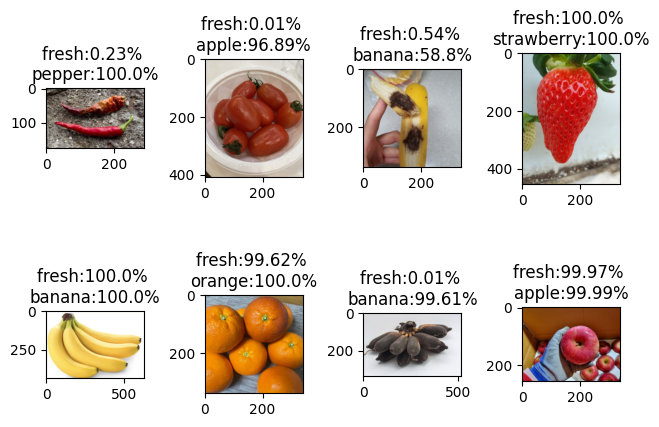

[('strawberry', 0.99999785), ('apple', 1.9212823e-06), ('orange', 1.9887507e-07), ('peach', 4.0083759e-10), ('cherryTomato', 2.985092e-13), ('grape', 9.8229144e-14), ('broccoli', 7.351188e-14), ('pepper', 4.533883e-16), ('capsicum', 9.536428e-19), ('banana', 4.521308e-24)]
[('capsicum', 0.47729307), ('cherryTomato', 0.15160681), ('peach', 0.14417943), ('apple', 0.08755335), ('pepper', 0.05233144), ('banana', 0.038995378), ('strawberry', 0.031943943), ('grape', 0.012802756), ('broccoli', 0.0024311945), ('orange', 0.0008625969)]
[('broccoli', 1.0), ('apple', 1.7189578e-10), ('strawberry', 4.1735792e-11), ('capsicum', 8.450208e-12), ('pepper', 2.565848e-12), ('banana', 1.178869e-13), ('orange', 7.903326e-15), ('grape', 3.839026e-15), ('peach', 9.337626e-20), ('cherryTomato', 1.5127073e-25)]
[('pepper', 0.99891067), ('strawberry', 0.0004996975), ('banana', 0.00040679457), ('capsicum', 9.728579e-05), ('broccoli', 7.948985e-05), ('peach', 4.055291e-06), ('apple', 9.653329e-07), ('grape', 5.2

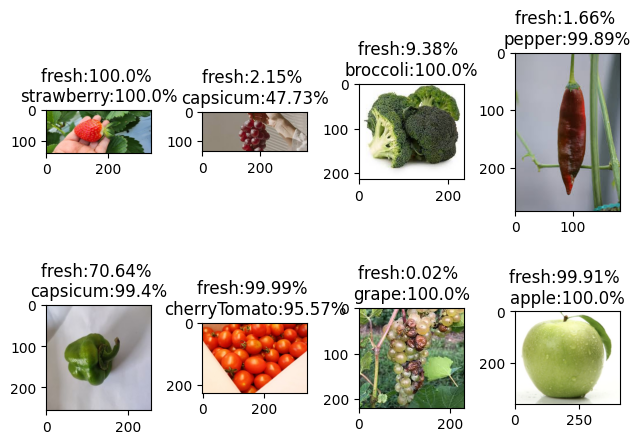

[('strawberry', 1.0), ('grape', 4.994592e-09), ('broccoli', 5.400217e-12), ('peach', 7.962723e-13), ('apple', 4.835692e-13), ('cherryTomato', 2.611179e-13), ('pepper', 1.1569539e-14), ('orange', 5.7979664e-15), ('capsicum', 2.7425713e-15), ('banana', 5.371344e-26)]
[('broccoli', 0.99999976), ('capsicum', 1.9396215e-07), ('strawberry', 2.399938e-10), ('apple', 1.319326e-10), ('grape', 1.1192249e-11), ('pepper', 2.6217743e-12), ('banana', 6.005054e-13), ('orange', 5.0046264e-15), ('peach', 1.7620492e-17), ('cherryTomato', 1.0835128e-21)]
[('apple', 0.8498805), ('peach', 0.062208273), ('orange', 0.03274052), ('banana', 0.025991192), ('capsicum', 0.022380363), ('strawberry', 0.002271228), ('cherryTomato', 0.0021503277), ('broccoli', 0.001754373), ('pepper', 0.00050764054), ('grape', 0.00011553975)]
[('capsicum', 0.9997155), ('peach', 0.0001941923), ('grape', 6.0437495e-05), ('apple', 1.9647452e-05), ('cherryTomato', 9.586514e-06), ('broccoli', 5.9663745e-07), ('strawberry', 6.0774305e-08),

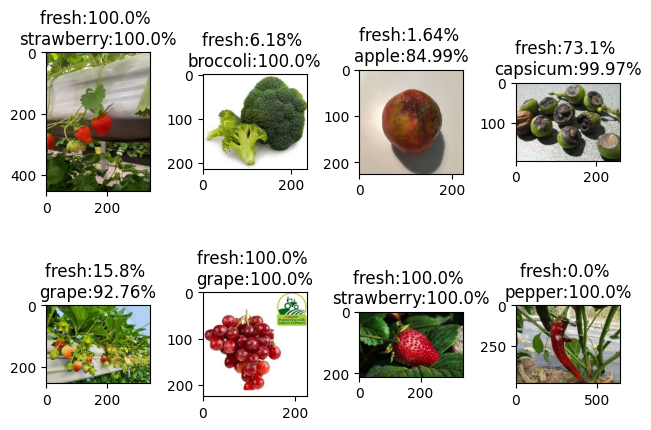

[('strawberry', 1.0), ('grape', 3.5517224e-16), ('peach', 7.82165e-24), ('apple', 2.1794134e-24), ('cherryTomato', 1.5964215e-25), ('broccoli', 1.354767e-25), ('capsicum', 7.8709983e-26), ('pepper', 5.3456003e-29), ('orange', 6.231134e-32), ('banana', 0.0)]
[('apple', 1.0), ('orange', 1.511278e-16), ('capsicum', 3.2148158e-23), ('banana', 3.0067327e-28), ('peach', 7.280194e-29), ('strawberry', 3.3227422e-30), ('broccoli', 2.4398118e-32), ('cherryTomato', 5.2868318e-36), ('pepper', 0.0), ('grape', 0.0)]
[('strawberry', 0.9999999), ('grape', 1.6004603e-07), ('broccoli', 1.5574562e-08), ('pepper', 1.0294609e-08), ('apple', 9.407091e-09), ('peach', 4.090915e-09), ('cherryTomato', 1.4456015e-09), ('orange', 1.0028982e-10), ('capsicum', 8.055466e-12), ('banana', 1.2869774e-15)]
[('grape', 0.9990735), ('capsicum', 0.0006218851), ('strawberry', 0.00020730284), ('cherryTomato', 5.3678934e-05), ('peach', 2.7333159e-05), ('broccoli', 9.624755e-06), ('apple', 6.0418065e-06), ('pepper', 5.0042087e-

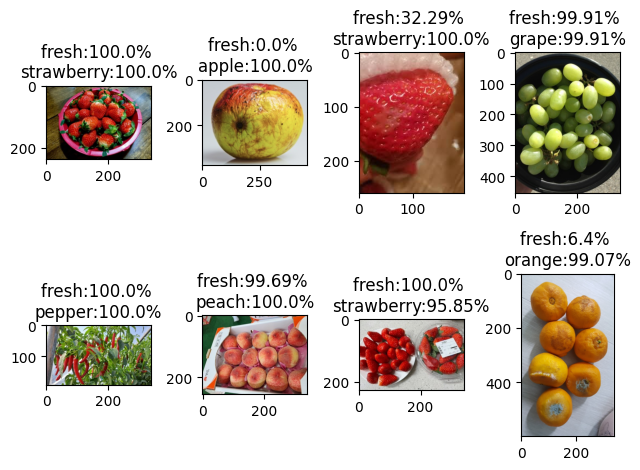

[('apple', 1.0), ('orange', 6.8777166e-09), ('broccoli', 9.2349434e-10), ('banana', 2.1923245e-10), ('capsicum', 6.5708355e-11), ('strawberry', 7.3918405e-13), ('peach', 7.0117413e-15), ('pepper', 5.6082295e-16), ('cherryTomato', 9.3810833e-26), ('grape', 3.130771e-26)]
[('pepper', 1.0), ('broccoli', 3.859897e-09), ('capsicum', 3.6222061e-10), ('grape', 2.5065989e-14), ('strawberry', 2.3888942e-15), ('banana', 6.735641e-16), ('apple', 5.283153e-17), ('orange', 4.1096454e-17), ('cherryTomato', 1.7828388e-19), ('peach', 1.0121016e-20)]
[('peach', 0.9996451), ('orange', 0.00032697796), ('apple', 2.7940248e-05), ('grape', 3.5042895e-08), ('strawberry', 3.4395207e-08), ('cherryTomato', 5.8424854e-10), ('banana', 3.1316394e-13), ('pepper', 5.5042916e-15), ('capsicum', 3.4260725e-15), ('broccoli', 3.549805e-20)]
[('peach', 0.9985732), ('grape', 0.0014216753), ('orange', 4.5960605e-06), ('apple', 4.833893e-07), ('cherryTomato', 2.846276e-08), ('strawberry', 2.1161897e-08), ('capsicum', 9.67502

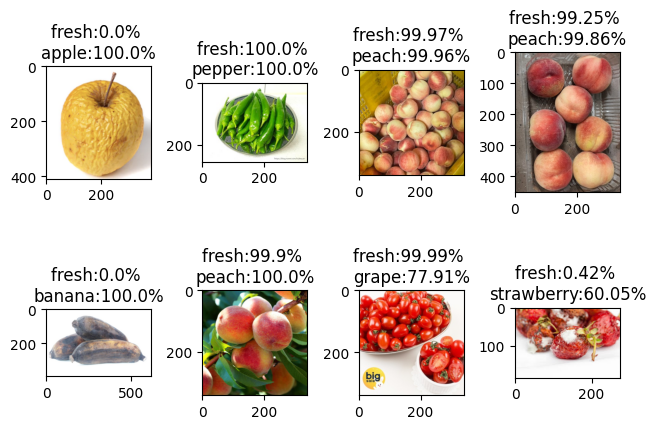

[('banana', 1.0), ('broccoli', 6.5998407e-10), ('pepper', 3.4670825e-10), ('grape', 2.4361688e-15), ('orange', 4.5502144e-16), ('strawberry', 8.943743e-19), ('apple', 1.9024973e-19), ('peach', 1.545416e-19), ('capsicum', 3.054707e-23), ('cherryTomato', 2.1825779e-29)]
[('orange', 1.0), ('apple', 7.003204e-14), ('peach', 8.952993e-19), ('strawberry', 8.6562466e-19), ('cherryTomato', 2.028591e-20), ('banana', 2.6130434e-27), ('grape', 6.534048e-28), ('pepper', 4.403041e-31), ('capsicum', 7.956811e-37), ('broccoli', 0.0)]
[('pepper', 1.0), ('banana', 2.5943236e-10), ('broccoli', 4.4459115e-12), ('strawberry', 8.444641e-14), ('capsicum', 9.394637e-15), ('apple', 1.0546162e-15), ('orange', 4.4854153e-16), ('grape', 4.5418163e-18), ('cherryTomato', 5.320906e-20), ('peach', 4.89482e-21)]
[('broccoli', 0.99995315), ('capsicum', 4.646667e-05), ('grape', 3.4108916e-07), ('strawberry', 5.395936e-09), ('pepper', 1.3092534e-09), ('apple', 4.7085332e-11), ('banana', 1.7746118e-13), ('peach', 1.83359

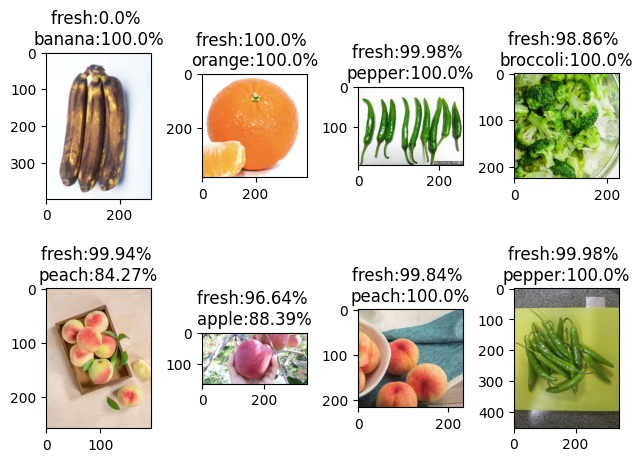

[('peach', 0.96549547), ('apple', 0.011368665), ('orange', 0.010616501), ('strawberry', 0.00906737), ('cherryTomato', 0.0025679758), ('banana', 0.00046366637), ('grape', 0.000251704), ('pepper', 0.0001662875), ('capsicum', 2.0579091e-06), ('broccoli', 3.2084847e-07)]
[('apple', 1.0), ('orange', 7.3289924e-12), ('banana', 1.0773711e-15), ('broccoli', 2.7252668e-17), ('capsicum', 6.59875e-20), ('strawberry', 1.906674e-20), ('peach', 9.680594e-21), ('cherryTomato', 8.937494e-28), ('pepper', 4.2743235e-29), ('grape', 6.279691e-33)]
[('apple', 0.99953425), ('capsicum', 0.0002736216), ('orange', 0.00012842768), ('banana', 5.5034627e-05), ('peach', 8.220362e-06), ('cherryTomato', 2.665514e-07), ('pepper', 6.9374e-08), ('strawberry', 6.884962e-08), ('broccoli', 3.705243e-08), ('grape', 5.356121e-10)]
[('banana', 1.0), ('pepper', 4.4375987e-09), ('broccoli', 1.7491165e-11), ('grape', 2.2043412e-14), ('strawberry', 1.2186479e-16), ('peach', 1.5728163e-18), ('orange', 4.2441244e-19), ('apple', 4.

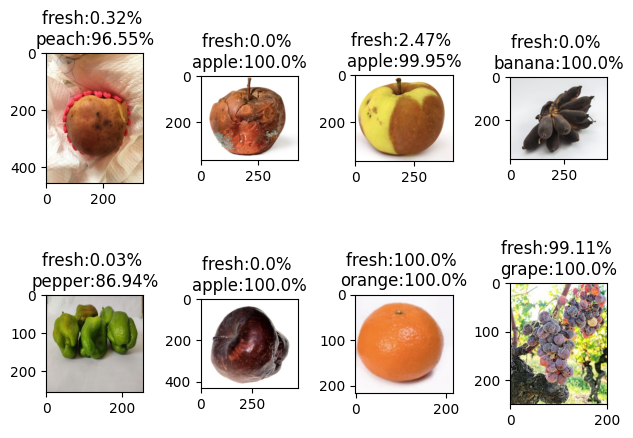

[('peach', 0.9995759), ('apple', 0.0002614762), ('strawberry', 8.785268e-05), ('orange', 7.194581e-05), ('cherryTomato', 2.305997e-06), ('grape', 4.789061e-07), ('pepper', 4.878065e-11), ('banana', 5.635731e-12), ('capsicum', 4.6354164e-13), ('broccoli', 8.105504e-16)]
[('pepper', 1.0), ('banana', 3.7731976e-15), ('orange', 3.0739172e-20), ('broccoli', 3.2806528e-21), ('strawberry', 2.067772e-21), ('capsicum', 2.2352052e-22), ('apple', 1.0982393e-22), ('grape', 4.9516395e-25), ('peach', 6.3013065e-27), ('cherryTomato', 1.1341318e-27)]
[('strawberry', 0.9999999), ('apple', 1.3754737e-07), ('broccoli', 7.869279e-09), ('grape', 6.551869e-09), ('peach', 1.1945935e-09), ('orange', 2.8640769e-11), ('capsicum', 7.9819614e-12), ('cherryTomato', 1.1330118e-12), ('pepper', 9.358198e-13), ('banana', 2.0656126e-20)]
[('strawberry', 1.0), ('broccoli', 5.2495485e-15), ('grape', 4.168827e-16), ('apple', 2.46606e-16), ('peach', 6.4889196e-19), ('orange', 5.520786e-20), ('pepper', 7.915098e-21), ('cher

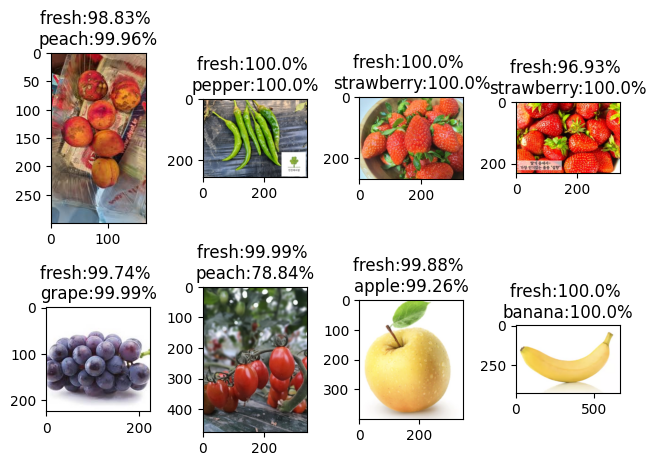

In [ ]:
for i in range(0,10):
    n =  i *8

    import matplotlib.pyplot as plt


    fresh_preds = preds[0][n:8+n]
    kind_preds = preds[1][n:8+n]

    for i ,pred in enumerate(kind_preds):

      plt.subplot(2,4,i+1)

      prob = zip(kind_list,list(kind_preds[i]))
      # print(list(prob))

      prob = sorted(list(prob),key=lambda x:x[1],reverse=True)
      print(prob)

      # print(prob)
      image = cv2.imread(x_test_df[0][i+n])
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      plt.imshow(image)
      plt.title(f'fresh:{round(float(fresh_preds[i])*100,2)}% \n{prob[0][0]}:{round(prob[0][1]*100,2)}%')
    plt.tight_layout()

    plt.savefig(f'Cnn_model_vgg/final/test_result_100{n}~{n+8}.jpg')

    plt.show()

In [ ]:
model.save_weights('Cnn_model3_kind_10/final/epoch_200/cpkt/cnn_model3_200_Kind_10')